In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import scipy.stats as stats

In [6]:
df = pd.read_csv('data.csv')


In [7]:
df.shape

(4600, 18)

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Price is the output columns (y) others are x (input features )

Lets check the numerical and categorical columns in the datasets 

converting date to Date format 

In [9]:
df['date'] = pd.to_datetime(df['date'])

Date Converted to datatime

In [10]:
df.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2024,2014-06-06,402000.0,3.0,2.5,2700,9994,1.0,0,3,4,1350,1350,1959,0,22728 10th Ave S,Des Moines,WA 98198,USA


In [11]:
def check (column):
    print(df[column].value_counts())


In [12]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


In [13]:
int_cols = ['bedrooms', 'waterfront', 'view', 'condition']
## they can be converted to integer datatypes

In [14]:
df[int_cols] = df[int_cols].astype(int)


In [15]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [16]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [17]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [18]:
df.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2368,2014-06-12,789500.0,4,2.5,3010,6100,2.0,0,0,3,3010,0,2005,0,6466 195th Pl NE,Redmond,WA 98052,USA


In [19]:
### there is only 4 column with categorical value i.e. street , city ,statezip and Country

In [20]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [21]:
numeric_col=['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']

In [22]:
df[numeric_col].corr()

## this is the correlation of numeric data 


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
date,1.000000,0.033906,0.005762,0.019263,0.029481,-0.020393,0.029607,0.017586,0.005844,0.007853,0.041038,-0.015050,0.001356,-0.018437
price,0.033906,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.005762,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.019263,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.029481,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,-0.020393,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.029607,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.017586,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.005844,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.007853,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818


In [23]:
plt.style.use('ggplot')

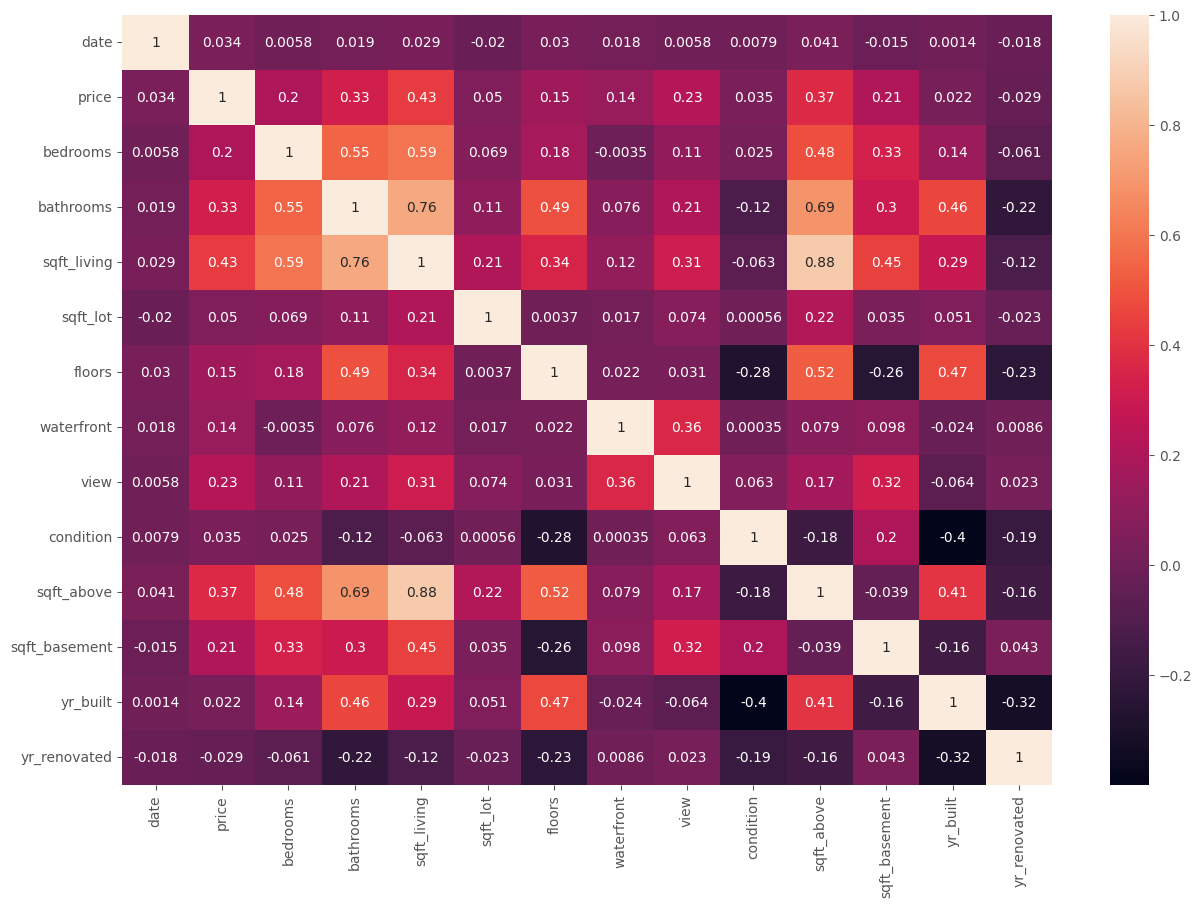

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numeric_col].corr(),annot=True)
plt.show()

<Figure size 2500x500 with 0 Axes>

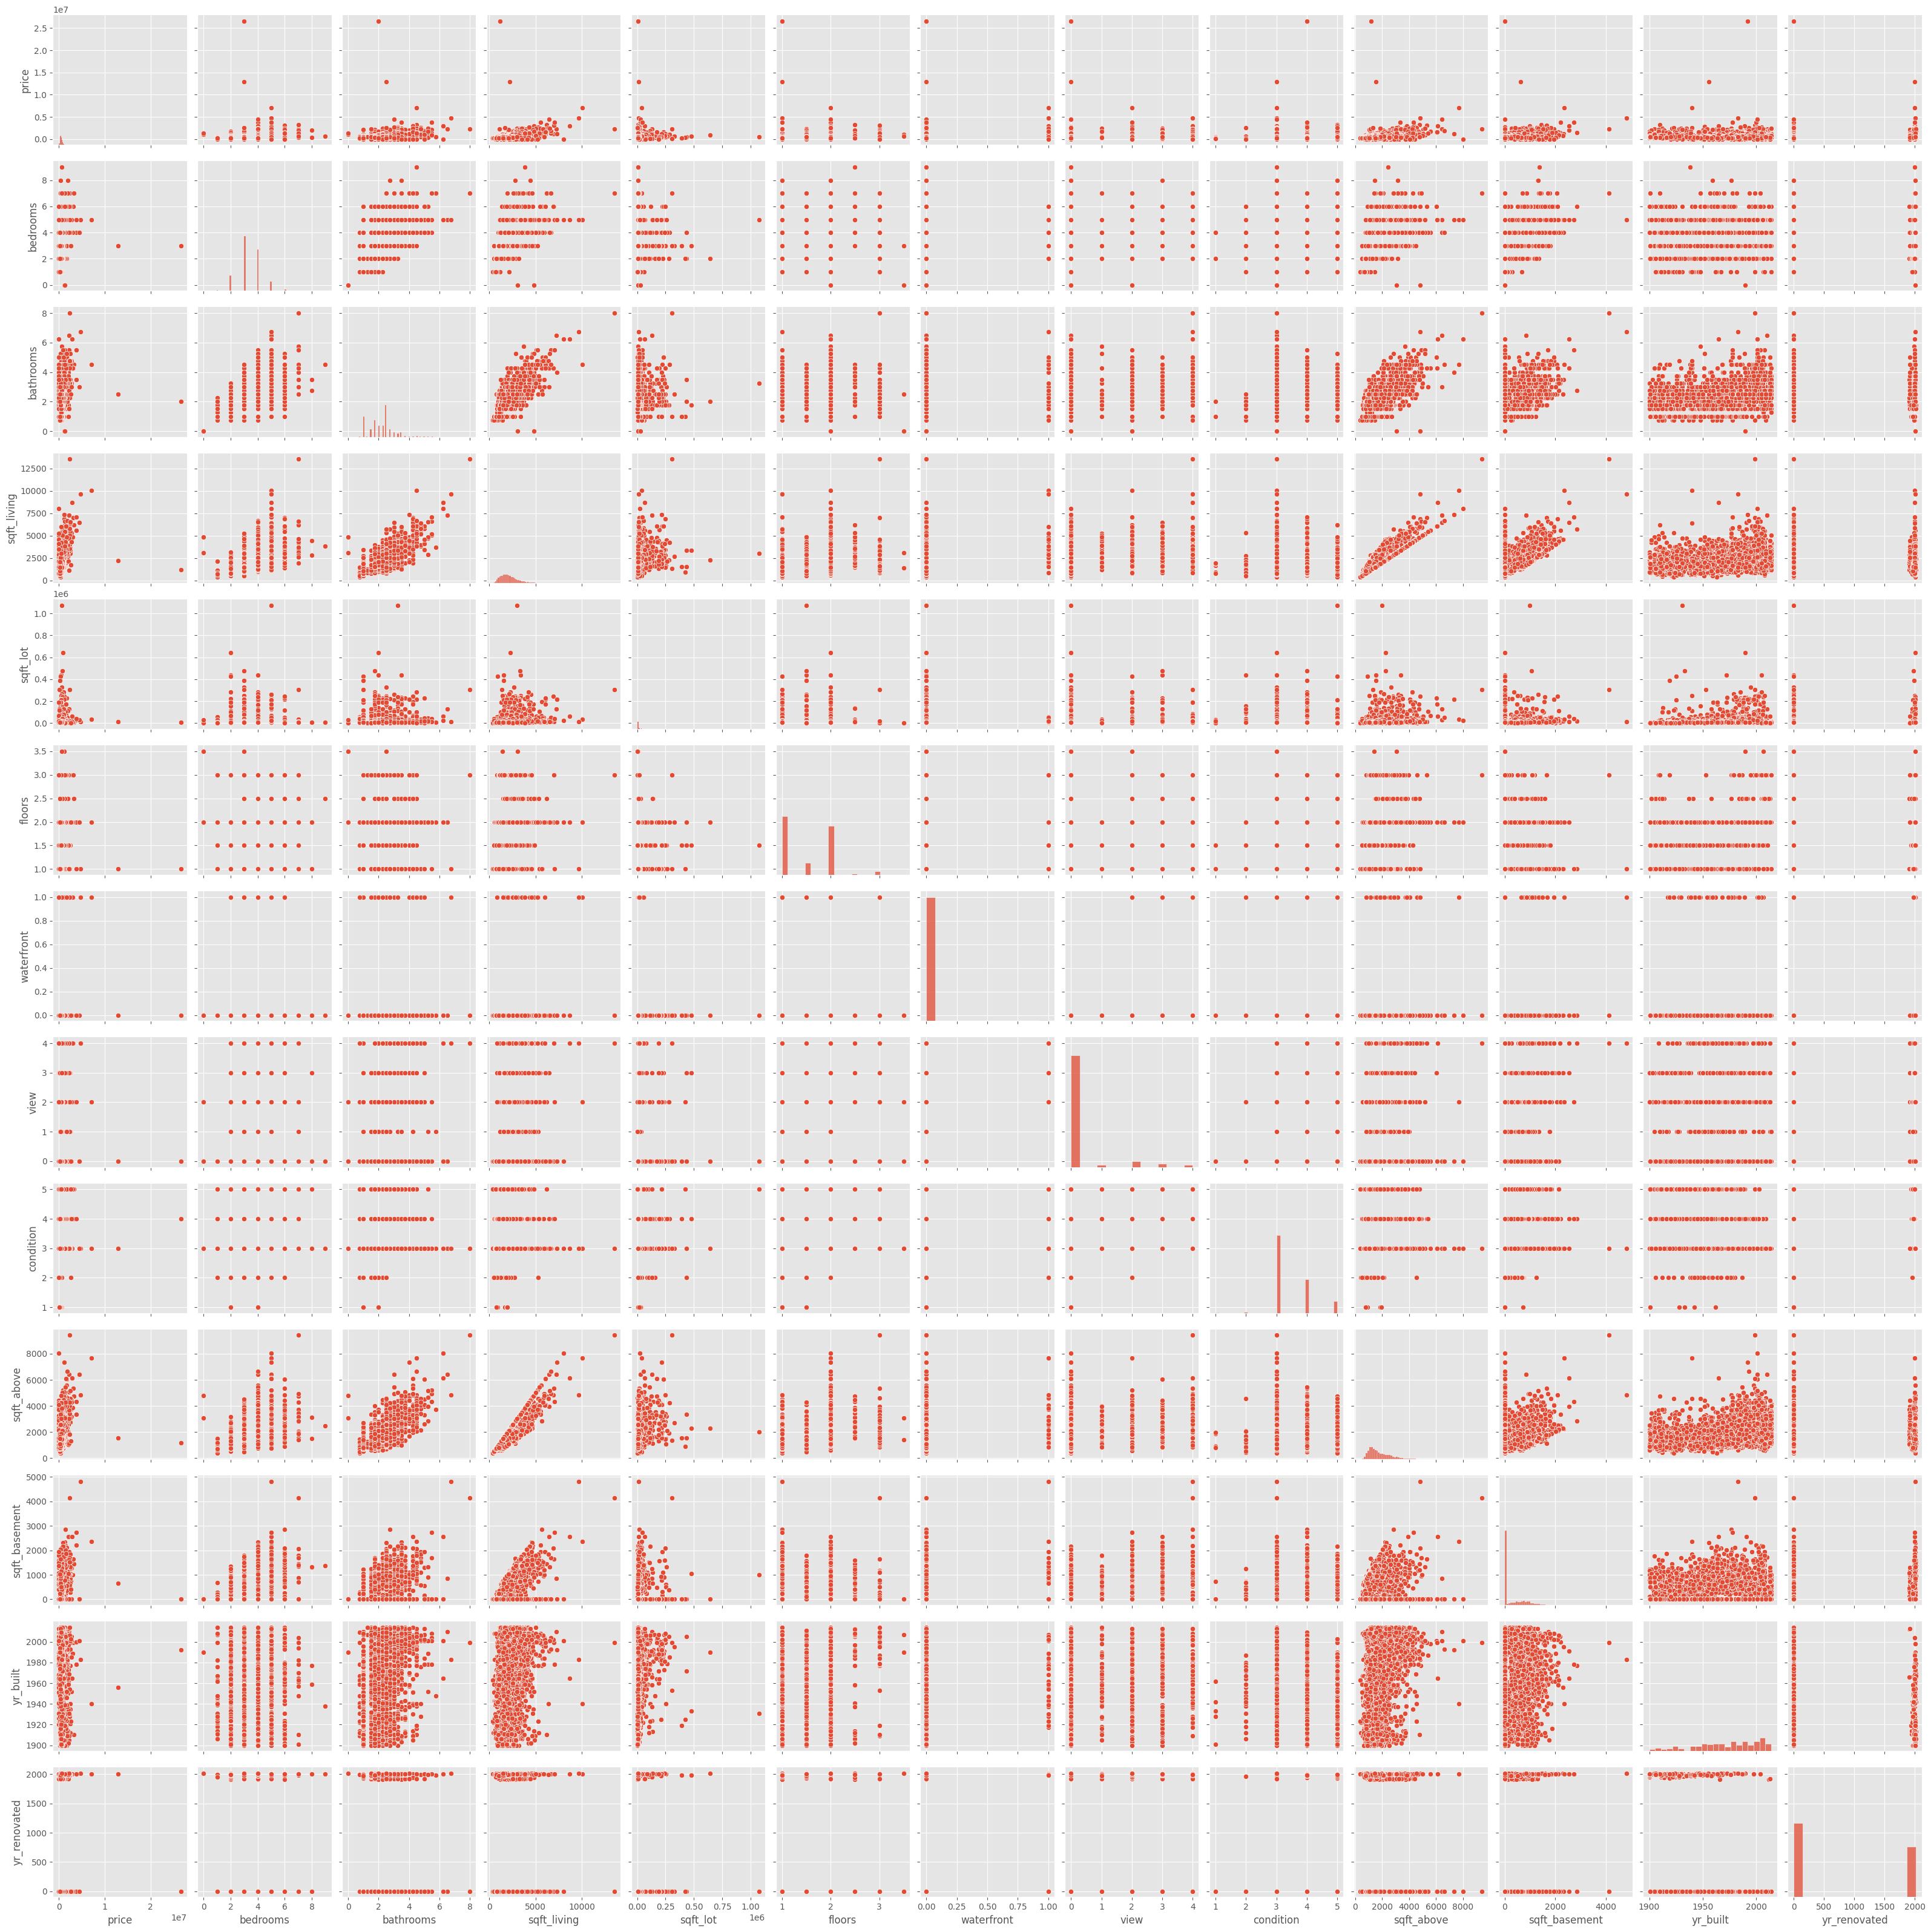

In [25]:
plt.figure(figsize=(25, 5))
sns.pairplot(df)
plt.show()

In [26]:
df[numeric_col].corr()["price"].sort_values()

yr_renovated    -0.028774
yr_built         0.021857
date             0.033906
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Name: price, dtype: float64

In [27]:
x = df[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_basement','view']]
y = df['price']

## Try using multi-linear regression without performing and polynomial features transformation 
### First train test split data 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3680, 6)
(3680,)
(920, 6)
(920,)


Train the model 

In [31]:
lr= LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

It fits the model 

In [33]:
print("intercept:",lr.intercept_)
print("coefficient:",lr.coef_)

intercept: 125096.66826327652
coefficient: [-5.76765577e+04 -2.65083927e+03  2.84559450e+02 -5.71683188e-01
  1.36534414e+01  7.23756728e+04]


## predict using predict function 

In [34]:
y_predict = lr.predict(x_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_predict)

0.0315160421951477

In [37]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,view
0,3,1.50,1340,7912,0,0
1,5,2.50,3650,9050,280,4
2,3,2.00,1930,11947,0,0
3,3,2.25,2000,8030,1000,0
4,4,2.50,1940,10500,800,0
...,...,...,...,...,...,...
4595,3,1.75,1510,6360,0,0
4596,3,2.50,1460,7573,0,0
4597,3,2.50,3010,7014,0,0
4598,4,2.00,2090,6630,1020,0


In [38]:
def kdeplot_qqplot():
    for column in numeric_col:
        if (column=="date"):
            continue
        
        print(df[column].skew())
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.kdeplot(df[column])
        plt.title("{} kdeplot".format(column))
    
        plt.subplot(122)
        stats.probplot(df[column],dist='norm',plot=plt)
        plt.title("{} qqplot".format(column))
    
        plt.show()


24.790932561757053


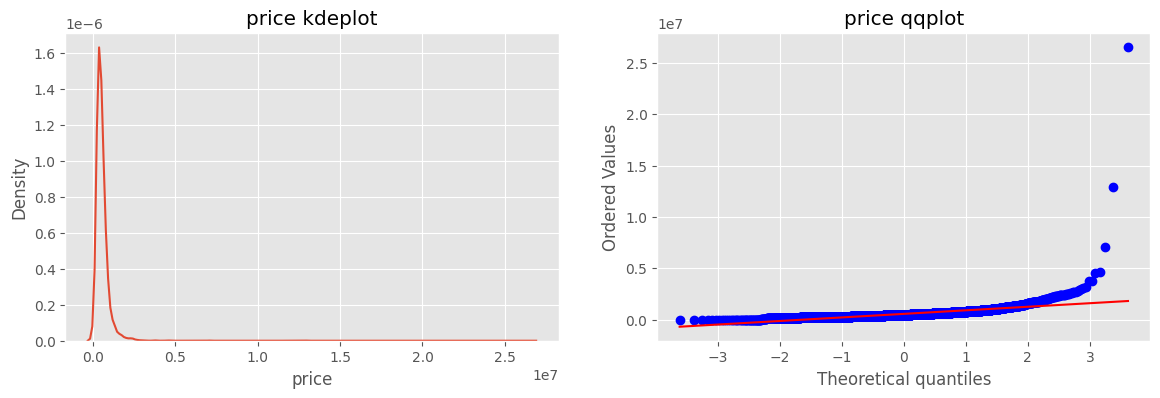

0.4564466330191457


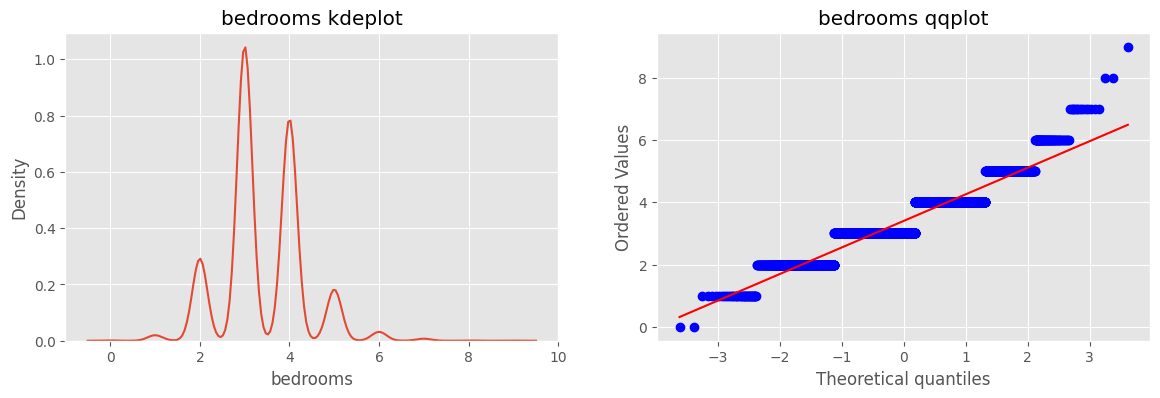

0.6160327233508812


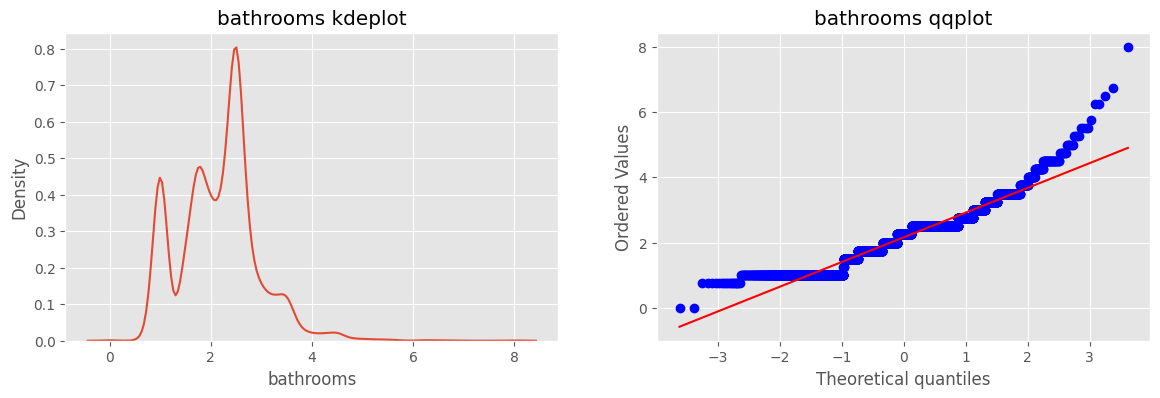

1.723513270622118


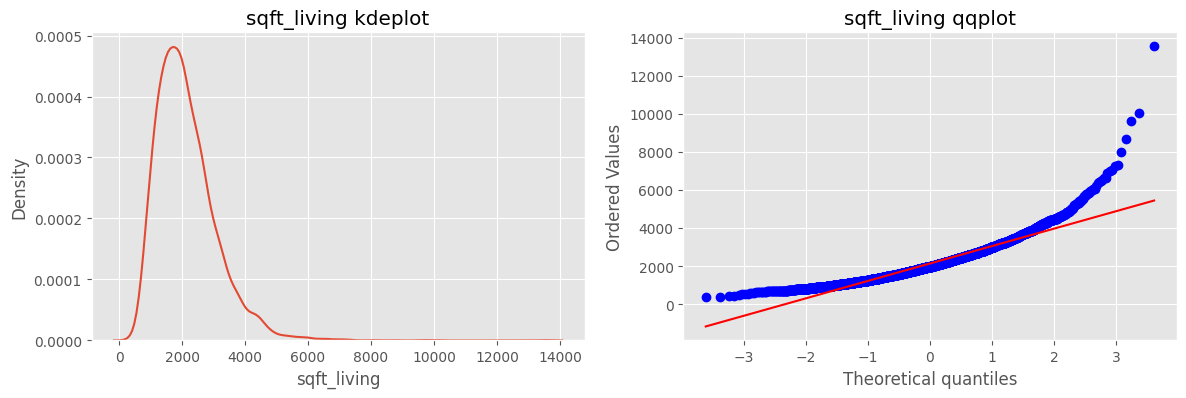

11.307138748782643


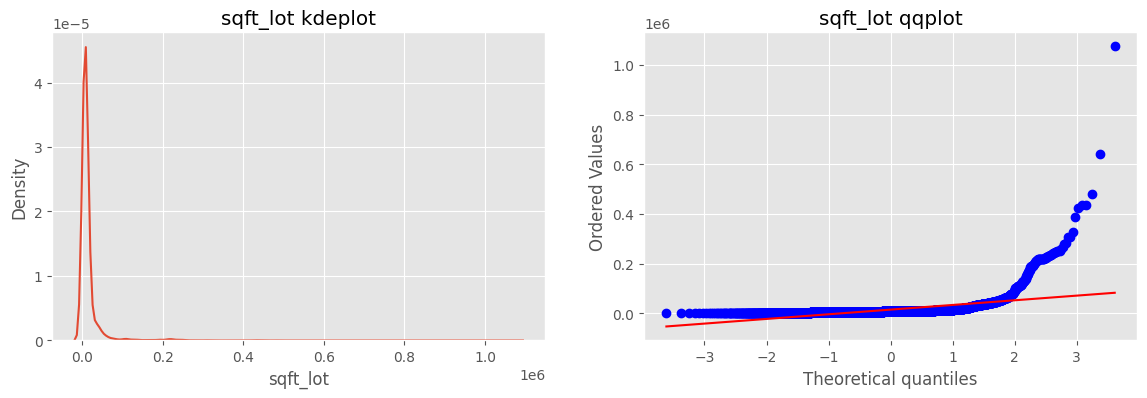

0.5514406463488161


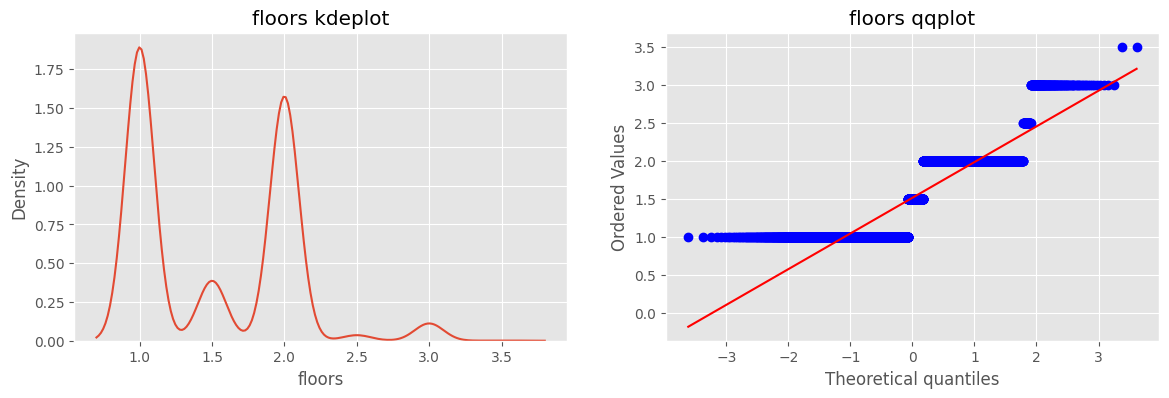

11.682900924983505


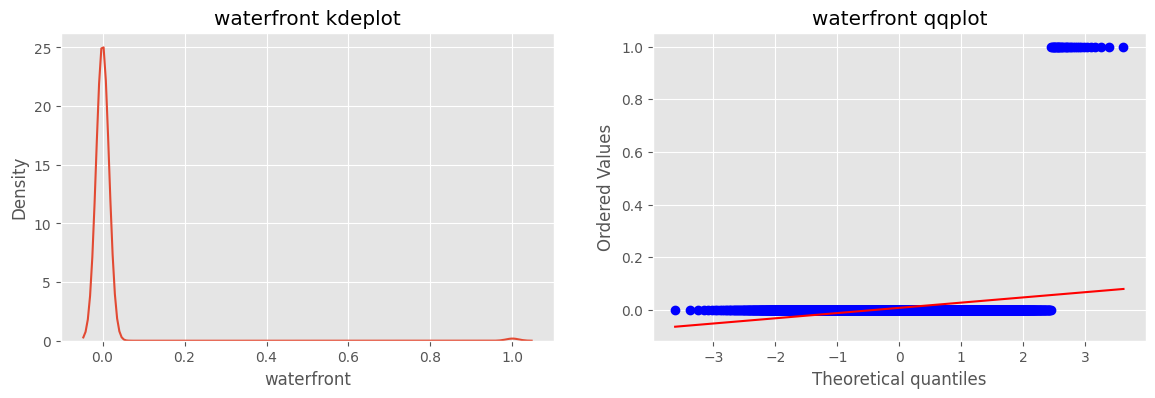

3.341586380673694


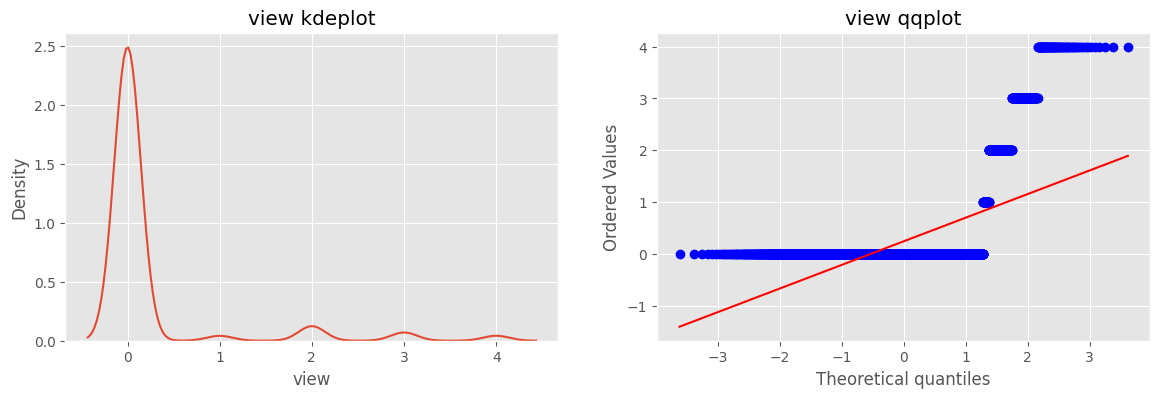

0.9590676635009114


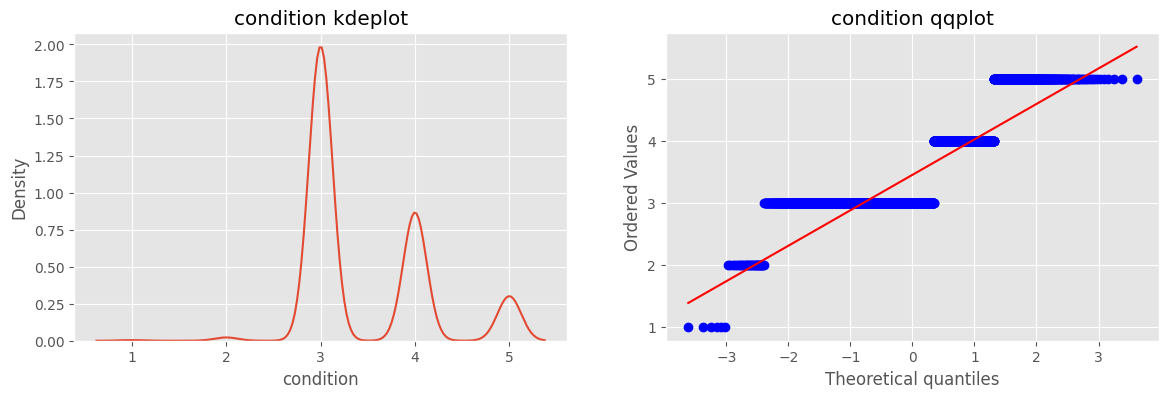

1.4942107479829443


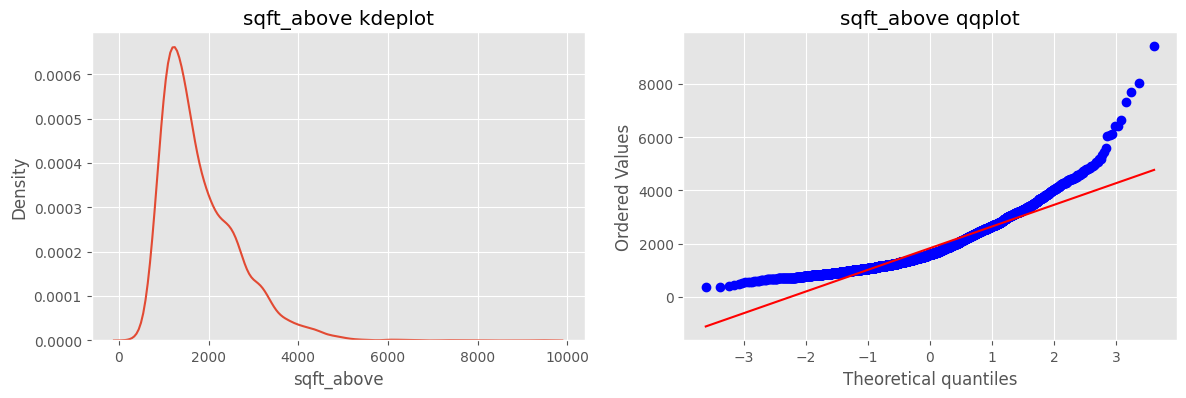

1.6427321922167097


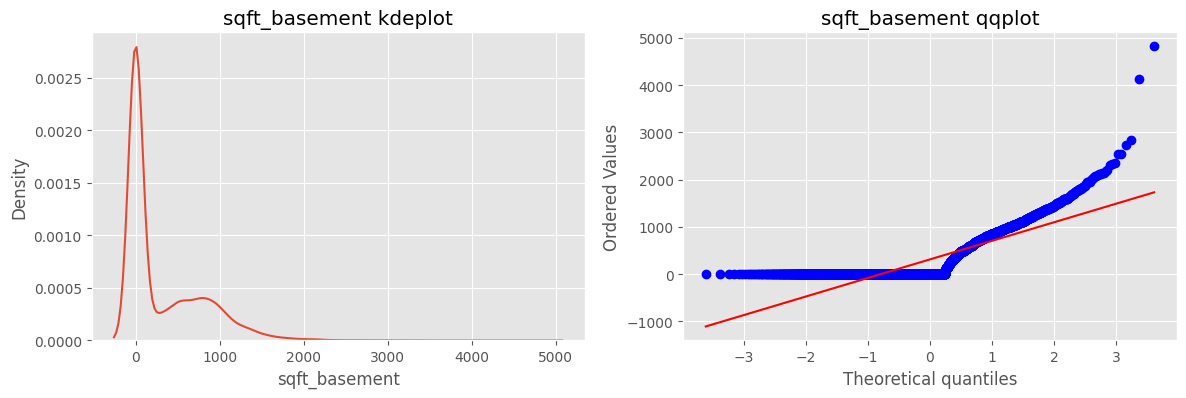

-0.5021551899878874


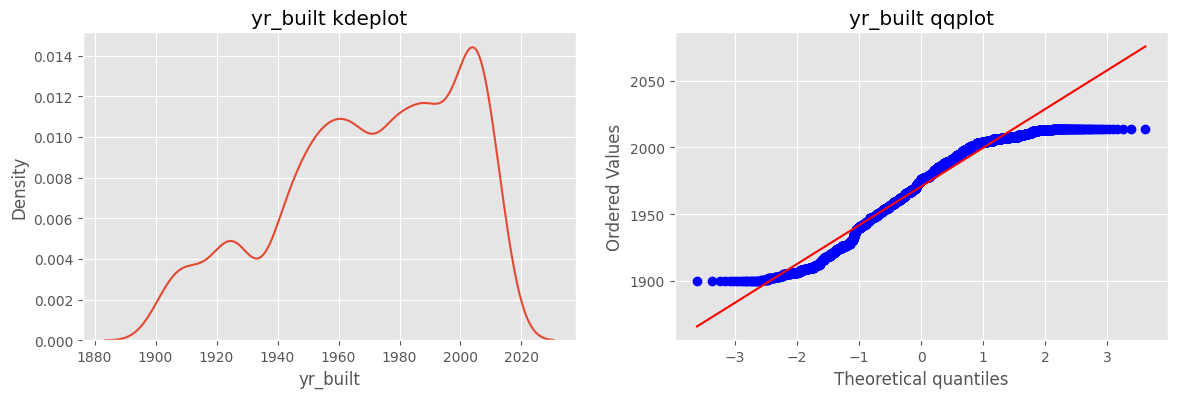

0.38591870088297575


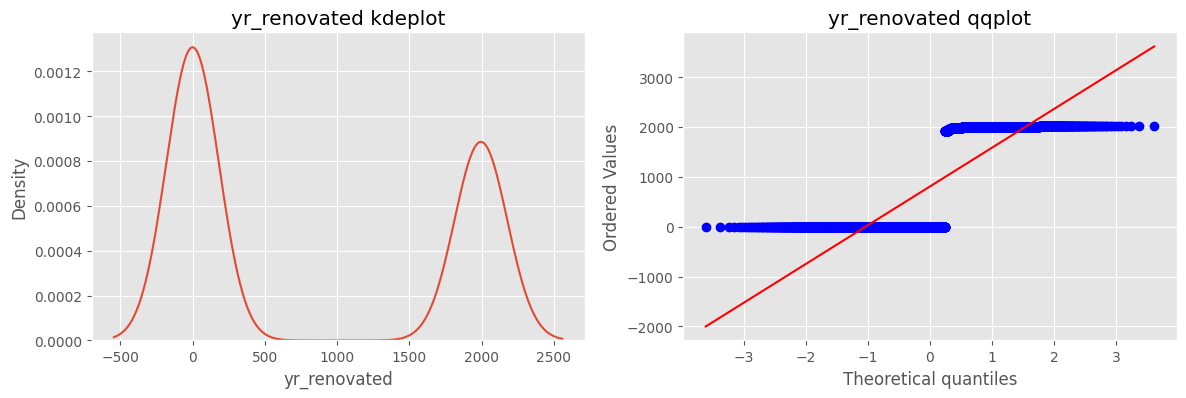

In [39]:
kdeplot_qqplot()

In [40]:
df.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1156,2014-05-22,270000.0,2,1.5,840,867,2.0,0,0,3,840,0,2005,0,9122 23rd Ave NE,Seattle,WA 98115,USA


In [41]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [42]:
df['street'].nunique()

4525

In [43]:
df[numeric_col].corr()['price'].sort_values()

yr_renovated    -0.028774
yr_built         0.021857
date             0.033906
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Name: price, dtype: float64

In [44]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.compose import ColumnTransformer

In [46]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,view
0,3,1.50,1340,7912,0,0
1,5,2.50,3650,9050,280,4
2,3,2.00,1930,11947,0,0
3,3,2.25,2000,8030,1000,0
4,4,2.50,1940,10500,800,0
...,...,...,...,...,...,...
4595,3,1.75,1510,6360,0,0
4596,3,2.50,1460,7573,0,0
4597,3,2.50,3010,7014,0,0
4598,4,2.00,2090,6630,1020,0


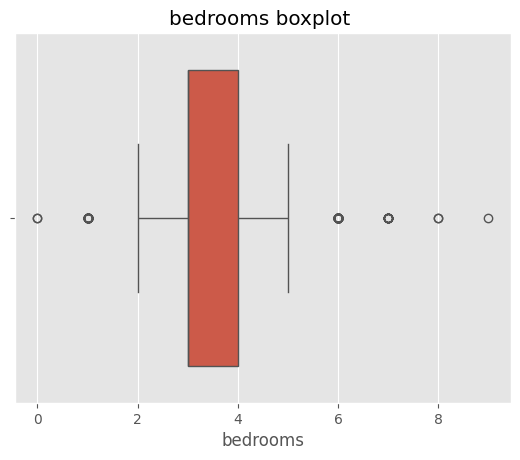

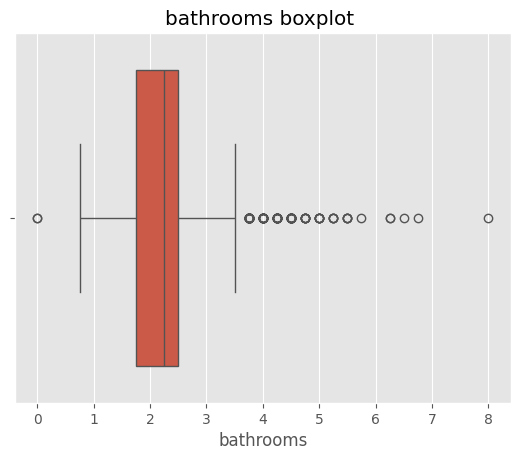

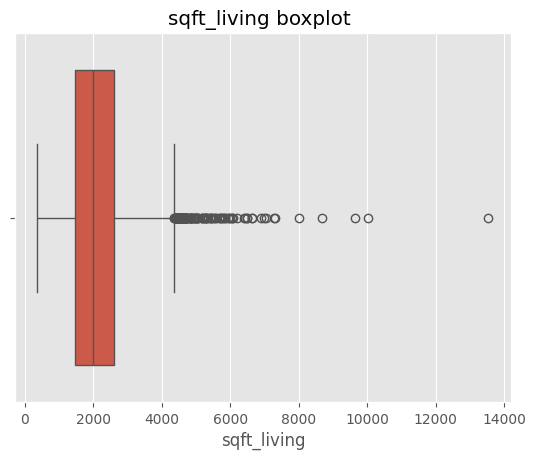

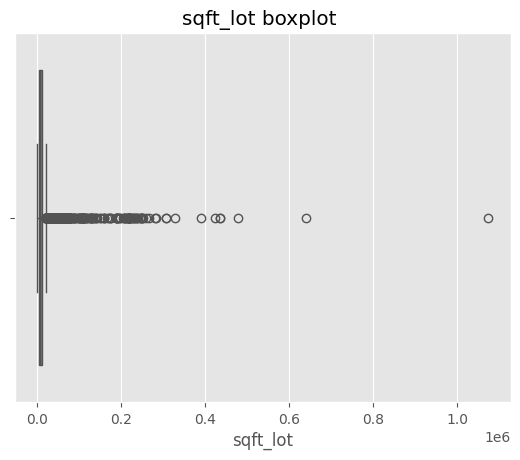

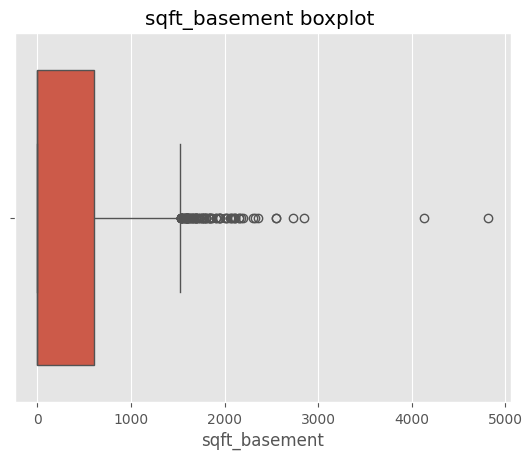

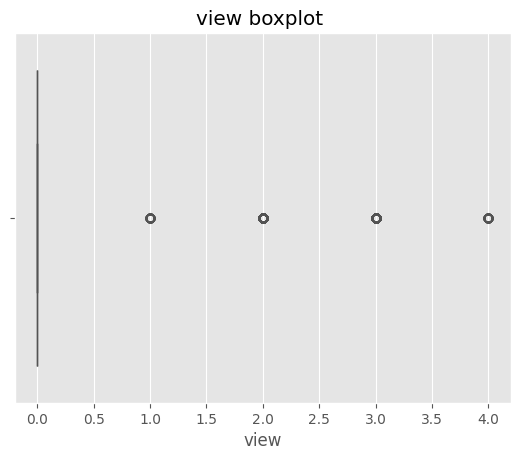

In [47]:
for column in x.columns:
    sns.boxplot(df[column], orient = 'h')
    plt.title('{} boxplot '.format(column))
    plt.show()

In [48]:
x['view']=x['view'].apply(lambda x: 0 if (x==0) else 1)

/tmp/ipykernel_33876/2875668956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['view']=x['view'].apply(lambda x: 0 if (x==0) else 1)


In [49]:
x['view'].value_counts()

view
0    4140
1     460
Name: count, dtype: int64

((array([-3.61414049, -3.37750595, -3.24701759, ...,  3.24701759,
          3.37750595,  3.61414049]),
  array([0, 0, 0, ..., 1, 1, 1])),
 (0.17563117342526088, 0.09999999999999999, 0.585016389256553))

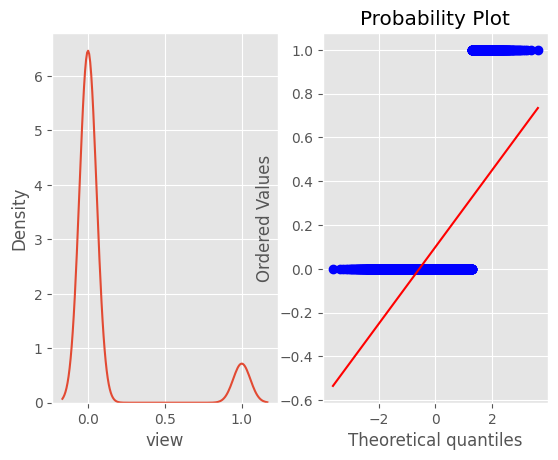

In [50]:
plt.subplot(121)
sns.kdeplot(x['view'])

plt.subplot(122)
stats.probplot(x['view'],plot=plt,dist='norm')

In [51]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,view
0,3,1.50,1340,7912,0,0
1,5,2.50,3650,9050,280,1
2,3,2.00,1930,11947,0,0
3,3,2.25,2000,8030,1000,0
4,4,2.50,1940,10500,800,0
...,...,...,...,...,...,...
4595,3,1.75,1510,6360,0,0
4596,3,2.50,1460,7573,0,0
4597,3,2.50,3010,7014,0,0
4598,4,2.00,2090,6630,1020,0


In [52]:
x.drop('view',axis=1, inplace= True)

/tmp/ipykernel_33876/561465474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('view',axis=1, inplace= True)


In [53]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement
0,3,1.50,1340,7912,0
1,5,2.50,3650,9050,280
2,3,2.00,1930,11947,0
3,3,2.25,2000,8030,1000
4,4,2.50,1940,10500,800
...,...,...,...,...,...
4595,3,1.75,1510,6360,0
4596,3,2.50,1460,7573,0
4597,3,2.50,3010,7014,0
4598,4,2.00,2090,6630,1020


In [54]:
transformer= ColumnTransformer(transformers=[
    ('powerT',PowerTransformer(),[0,1,2,3,4]),
    
],remainder='passthrough')
lr=LinearRegression()

from sklearn import set_config
set_config(display='diagram')

In [55]:
pipe= Pipeline([('trf1',transformer),('trf2',lr)])

In [56]:
x_train_scaled,x_test_scaled, y_train_scaled,y_test_scaled=train_test_split(x,y,test_size=0.2, random_state=42)

In [57]:
pipe.fit(x_train_scaled,y_train_scaled)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powerT', PowerTransformer(),
                                                  [0, 1, 2, 3, 4])])),
                ('trf2', LinearRegression())])

In [58]:
y_predict_scaled= pipe.predict(x_test)

In [59]:
r2_score(y_test_scaled,y_predict)

0.0315160421951477

In [60]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [61]:
df[(df['price']>1)& (df['price']>1)].shape

(4551, 18)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64